In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [2]:
df = pd.DataFrame(pd.read_csv("./Datasets/advertising.csv"))
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [6]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

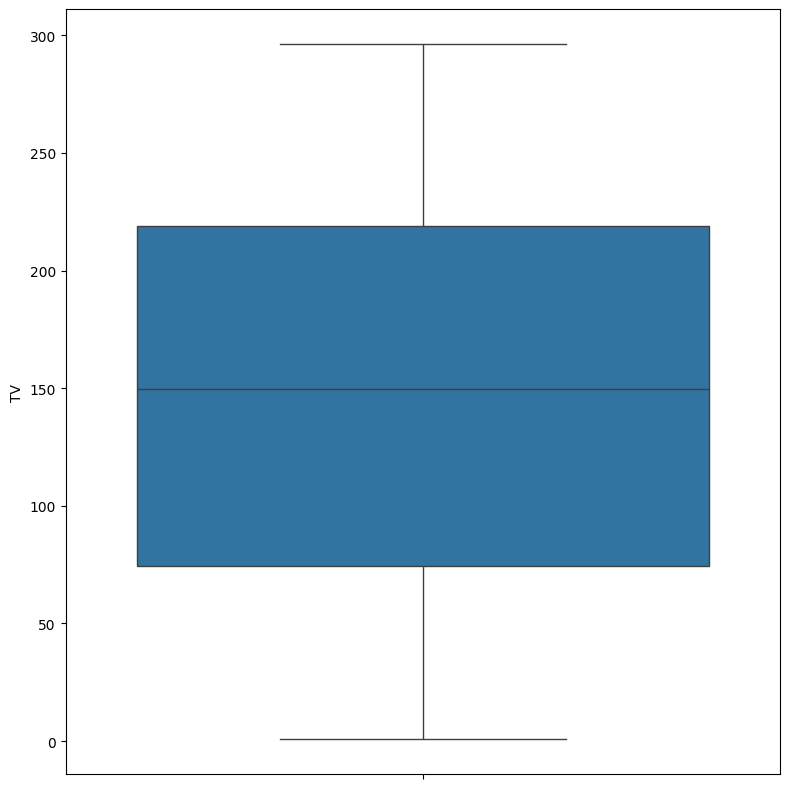

In [7]:
plt.figure(figsize = (8,8))
plt1 = sns.boxplot(df['TV'])
plt.tight_layout()

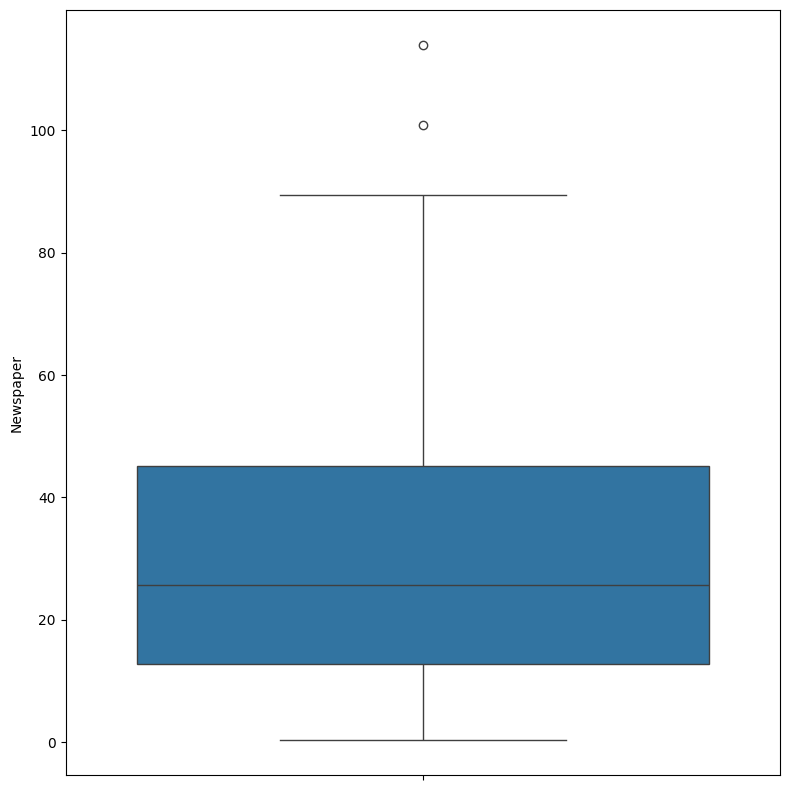

In [8]:
plt.figure(figsize = (8,8))
plt2 = sns.boxplot(df['Newspaper'])
plt.tight_layout()
plt.show()

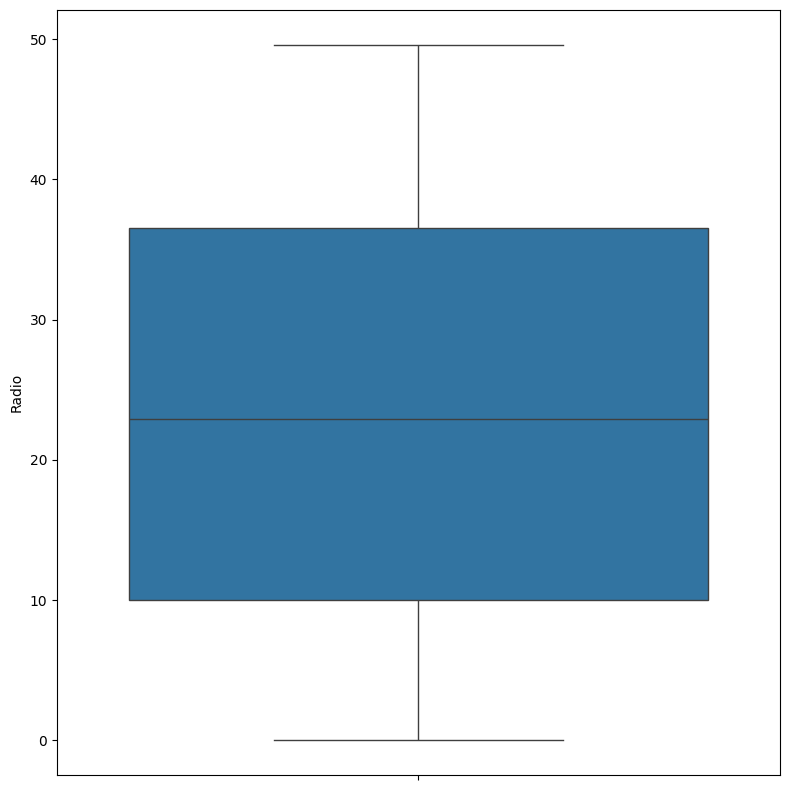

In [9]:
plt.figure(figsize = (8,8))
plt3 = sns.boxplot(df['Radio'])
plt.tight_layout()
plt.show()

# There are no considerable outliers present in the data.

## Exploratory Data Analysis

### Univariate Analysis

#### Sales (Target Variable)

In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


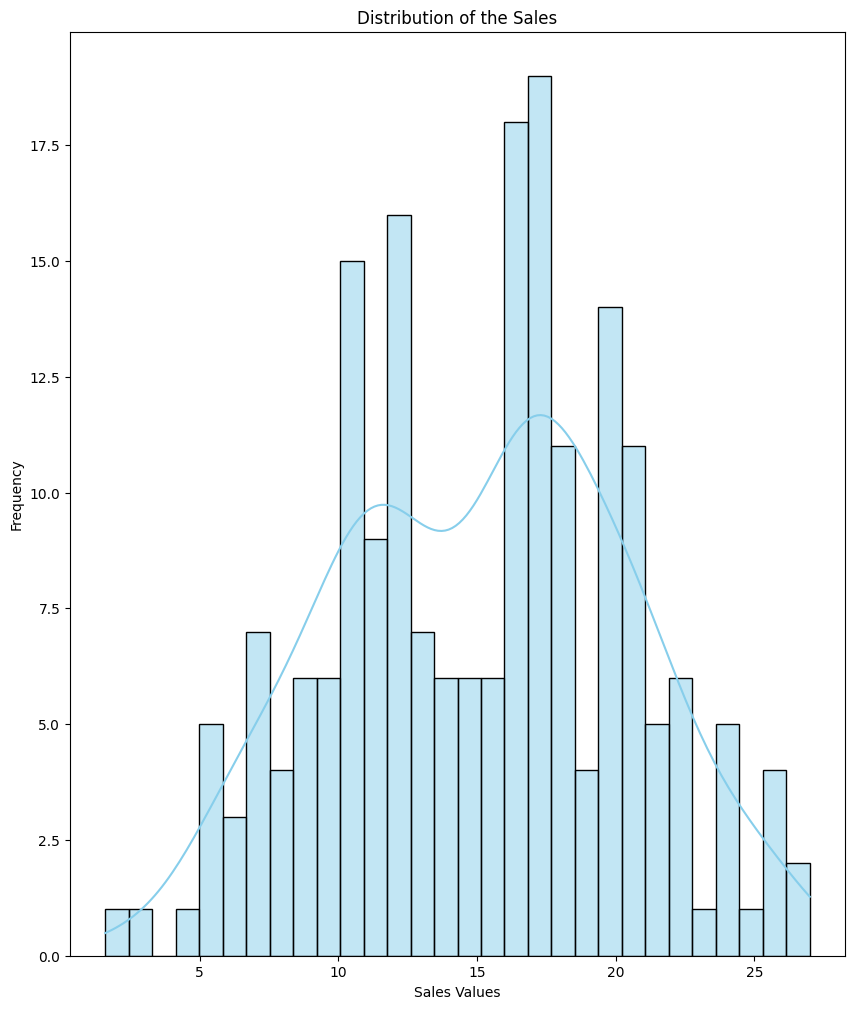

In [11]:
plt.figure(figsize = (10,12))
# Distribution plot
sns.histplot(df['Sales'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of the Sales')
plt.xlabel('Sales Values')
plt.ylabel('Frequency')
plt.show()


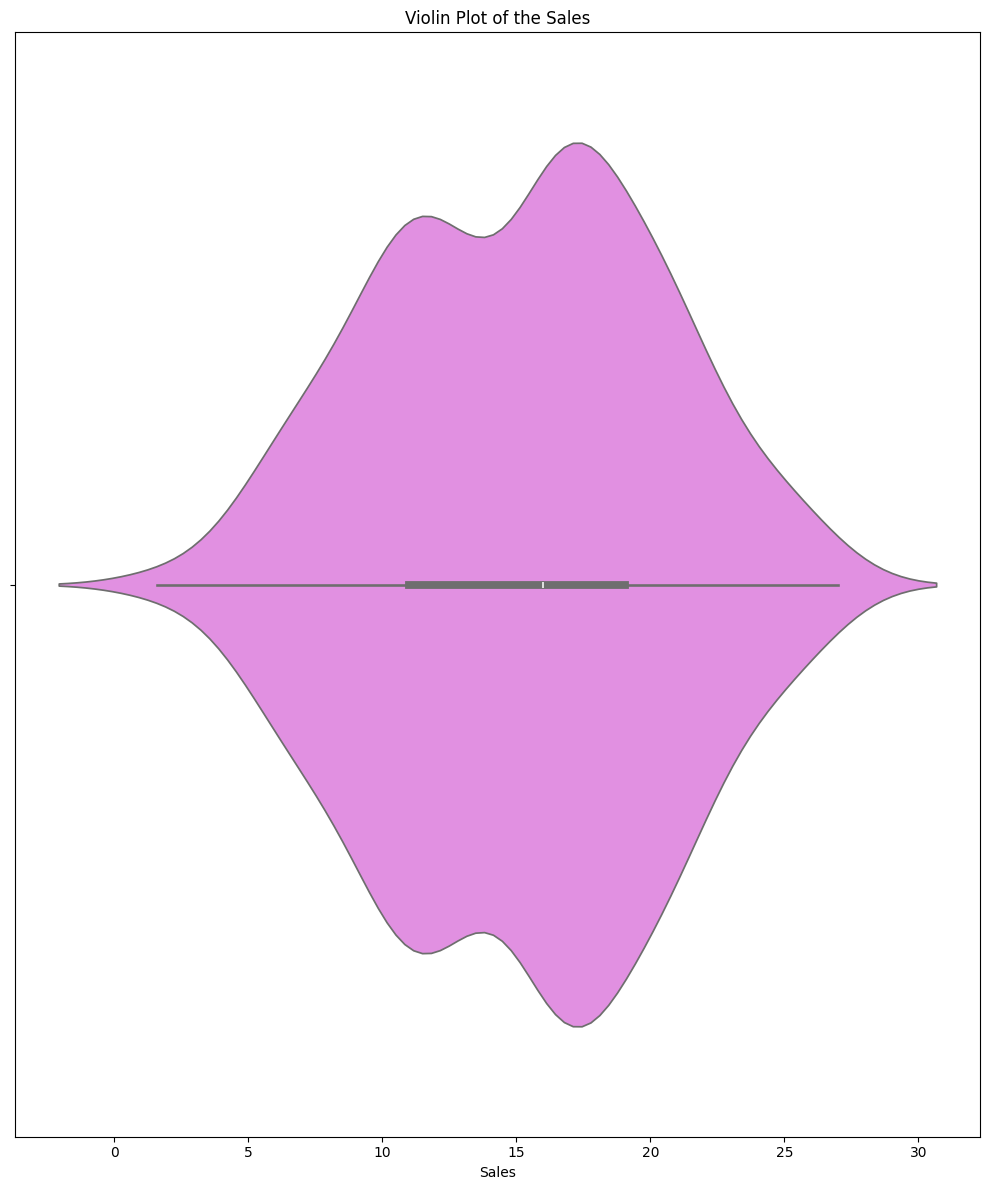

In [12]:
plt.figure(figsize = (10,12))
# Violin plot
sns.violinplot(x=df['Sales'], color='violet')
plt.title('Violin Plot of the Sales')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()

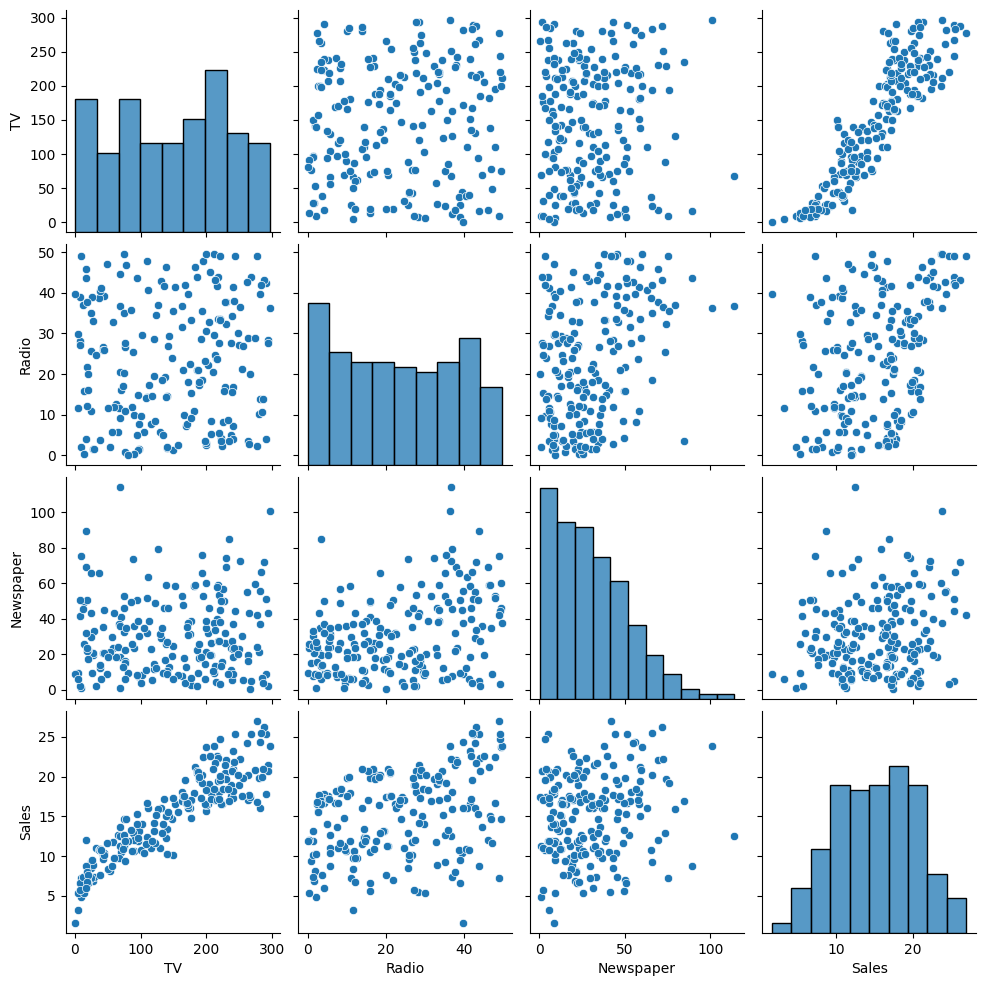

In [13]:
sns.pairplot(df)
plt.show()

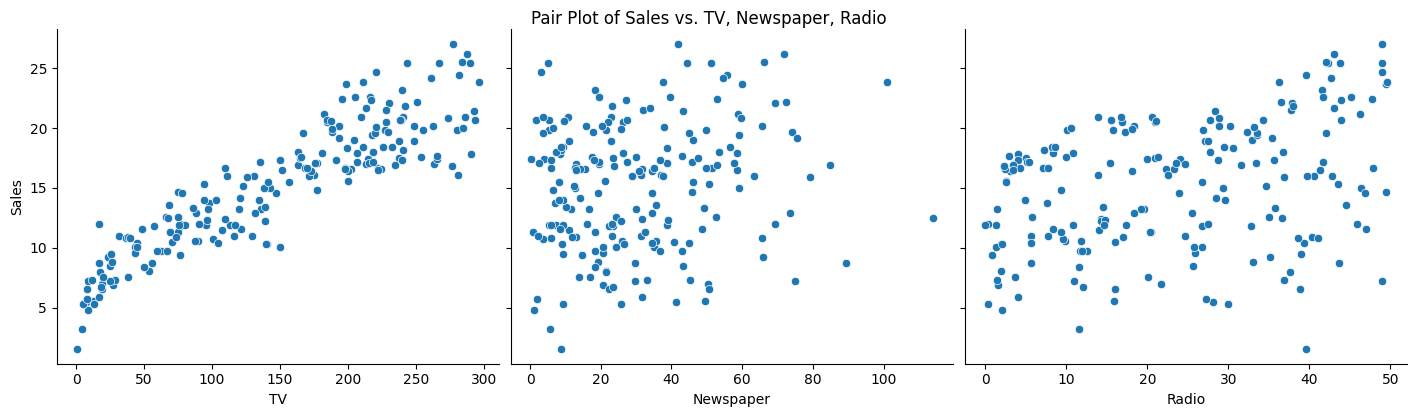

In [14]:
# plt.figure(figsize = (8,8))
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1.2, kind='scatter')
plt.suptitle('Pair Plot of Sales vs. TV, Newspaper, Radio', y=1.02)
plt.show()


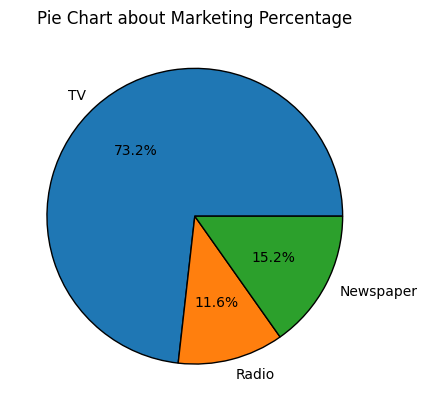

In [15]:
amounts = []
columns = ['TV', 'Radio', 'Newspaper']
for i in columns:
    amounts.append(df[i].sum())

plt.title("Pie Chart about Marketing Percentage")
plt.pie(amounts, labels=columns, autopct="%1.1f%%", wedgeprops={'edgecolor': 'black'} )
plt.show()

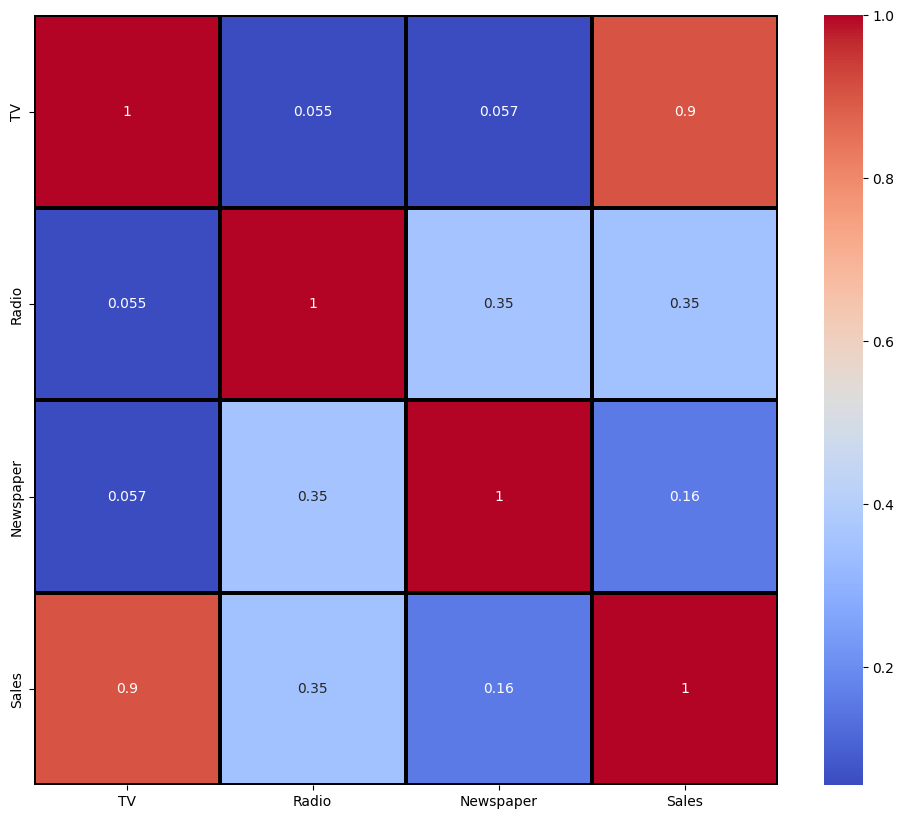

In [16]:
# Let's see the correlation between different variables.
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot = True, linecolor="black",linewidths=1.5)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

In [17]:
# Create a regression plot using Plotly Express
fig = px.scatter(df, x='TV', y='Sales', trendline="ols", title='Regression Plot', labels={'x': 'X-axis', 'y': 'Y-axis'},color_discrete_sequence=['#ff006e'])

# Update layout for a stylish appearance
fig.update_layout(
    title=dict(font=dict(size=25)),
    xaxis=dict(title=dict(font=dict(size=16))),
    yaxis=dict(title=dict(font=dict(size=16))),
    font=dict(family="Arial", size=12),
    template='plotly_white'
)
fig.show()

In [18]:
# Create a regression plot using Plotly Express
fig = px.scatter(df, x='Newspaper', y='Sales', trendline="ols", title='Regression Plot', labels={'x': 'X-axis', 'y': 'Y-axis'},color_discrete_sequence=['#3a86ff'])

# Update layout for a stylish appearance
fig.update_layout(
    title=dict(font=dict(size=25)),
    xaxis=dict(title=dict(font=dict(size=16))),
    yaxis=dict(title=dict(font=dict(size=16))),
    font=dict(family="Arial", size=12),
    template='plotly_white'
)
fig.show()

In [19]:
# Create a regression plot using Plotly Express
fig = px.scatter(df, x='Radio', y='Sales', trendline="ols", title='Regression Plot', labels={'x': 'X-axis', 'y': 'Y-axis'},color_discrete_sequence=['#8338ec'])

# Update layout for a stylish appearance
fig.update_layout(
    title=dict(font=dict(size=25)),
    xaxis=dict(title=dict(font=dict(size=16))),
    yaxis=dict(title=dict(font=dict(size=16))),
    font=dict(family="Arial", size=12),
    template='plotly_white'
)
fig.show()

## Model Building

### Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [20]:
X = df['TV']
y = df['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [23]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [24]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [25]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [26]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [27]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.52e-52
Time:                        20:35:38   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

# Insights Obtained:-
---

### Summary of Linear Regression Analysis

#### Key Statistics:

1. **Coefficient and Significance (p-values):**
   - The coefficient for the predictor variable `TV` is 0.054, and its associated p-value is statistically significant at a low level. This indicates that the observed association between `TV` and `Sales` is not merely due to chance.

2. **R-squared:**
   - The R-squared value is 0.816, suggesting that approximately 81.6% of the variance in the dependent variable `Sales` can be explained by the predictor variable `TV`. This represents a substantial proportion of explained variability.

3. **F Statistic and Significance:**
   - The F statistic has an extremely low p-value, indicating that the overall model fit is statistically significant. This implies that the explained variance in `Sales` is unlikely to occur purely by chance.

---

### Linear Regression Equation:

The linear regression equation derived from the analysis is as follows:

`Sales` = 6.948 + 0.054 * `TV` 

This equation represents the relationship between the predictor variable `TV` and the response variable `Sales`. The intercept term is 6.948, and the coefficient for `TV` is 0.054. Therefore, for each unit increase in `TV`, the predicted increase in `Sales` is 0.054, holding other variables constant.

The statistical significance of the coefficients and the high R-squared value indicate that the model provides a meaningful and significant representation of the relationship between `TV` and `Sales`.

In [28]:
# Create scatter plot
fig = px.scatter(df, x='TV', y='Sales', title='Scatter Plot with Regression Line', color_discrete_sequence=['#06d6a0'])
fig.add_trace(px.line(x=X_train, y=6.948 + 0.054*X_train, line_shape='linear',).data[0])
fig.update_layout(
    xaxis_title='X_train',
    yaxis_title='y_train',
    title=dict(text='Scatter Plot with Regression Line', font=dict(size=20)),
    font=dict(family="Arial", size=12),
    template='seaborn'
)
fig.show()

## Model Evaluation
### **Residual analysis:-** To validate assumptions of the model, and hence the reliability for inference
#### **Distribution of the error terms:-**
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


In [29]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

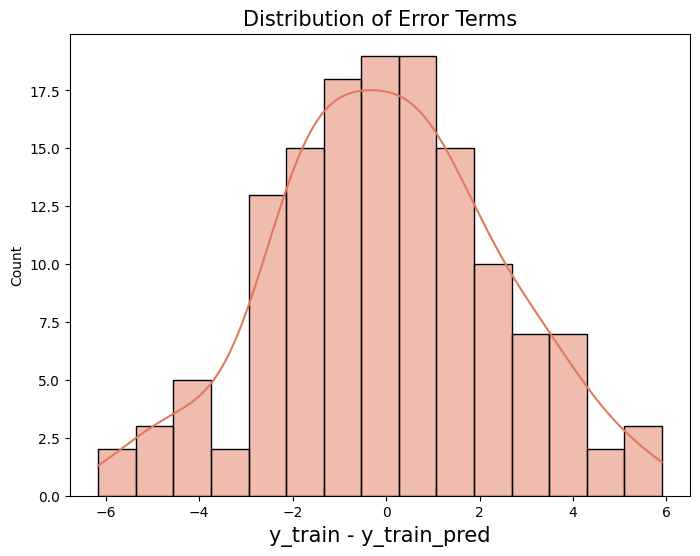

In [30]:
# Plot distribution of error terms using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(res, bins=15, color='#e07a5f', kde=True)
plt.title('Distribution of Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()


The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

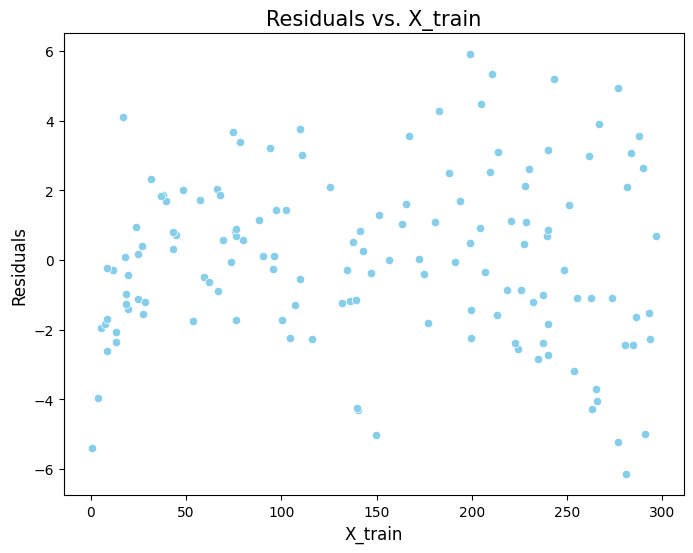

In [31]:
# Create scatter plot of X_train against residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train, y=res, color='skyblue')
plt.title('Residuals vs. X_train', fontsize=15)
plt.xlabel('X_train', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.
As you can see, the regression line is a pretty good fit to the data



### Predictions on the Test Set
Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [32]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [33]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [35]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

#### Checking the R-squared on the test set

In [36]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

Lower MSE indicates better model performance. <br/>
Higher value of R2 indicating a better fit of the model.

##### Visualizing the fit on the test set

In [37]:
# Create a DataFrame for Plotly Express
df_test = pd.DataFrame({'X_test': X_test, 'y_test': y_test})

# Create scatter plot
fig = px.scatter(df_test, x='X_test', y='y_test', title='Scatter Plot with Regression Line',color_discrete_sequence=['#89023e'])

# Add the regression line
fig.add_trace(px.line(x=X_test, y=6.948 + 0.054*X_test, line_shape='linear').data[0])

# Update layout for a stylish appearance
fig.update_layout(
    xaxis_title='X_test',
    yaxis_title='y_test',
    title=dict(text='Scatter Plot with Regression Line', font=dict(size=20)),
    font=dict(family="Arial", size=12),
    template='plotly_white'
)

# Show the plot
fig.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [38]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
X_train_lm.shape

(140,)

In [40]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)



In [41]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train_lm, y_train_lm)


LinearRegression()

In [43]:

y_pred = lr.predict(X_test_lm)


In [44]:
print(lr.intercept_)
print(lr.coef_)

6.948683200001357
[0.05454575]


The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

# XGBoost Regressor

### Using GridSearchCV to find the best parameters.

In [45]:
X = df.drop('Sales', axis="columns")
y = df['Sales']

X.head()


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [46]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)

X_train Shape: (160, 3)
X_test Shape: (40, 3)


In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [48]:
n_estimators = [ 30, 40, 50]
learning_rate = [0.1, 0.2, 0.3]
max_depth = [ 6, 7, 8]
gamma = [0.01, 0.1, 0.5]

clf = GridSearchCV(XGBRegressor(), {
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'gamma': gamma
    },
    cv=5,
    return_train_score=False
)

clf.fit(X, y)
clf_results = pd.DataFrame(clf.cv_results_)
print("Best Params:", clf.best_params_)

clf_results.sort_values(by="rank_test_score", inplace=True)
clf_results[['param_gamma', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score']]

Best Params: {'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 40}


,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score
10,0.01,0.2,6,40,"{'gamma': 0.01, 'learning_rate': 0.2, 'max_dep...",1
11,0.01,0.2,6,50,"{'gamma': 0.01, 'learning_rate': 0.2, 'max_dep...",2
39,0.1,0.2,7,30,"{'gamma': 0.1, 'learning_rate': 0.2, 'max_dept...",3
40,0.1,0.2,7,40,"{'gamma': 0.1, 'learning_rate': 0.2, 'max_dept...",4
41,0.1,0.2,7,50,"{'gamma': 0.1, 'learning_rate': 0.2, 'max_dept...",5
...,...,...,...,...,...,...
30,0.1,0.1,7,30,"{'gamma': 0.1, 'learning_rate': 0.1, 'max_dept...",77
6,0.01,0.1,8,30,"{'gamma': 0.01, 'learning_rate': 0.1, 'max_dep...",78
33,0.1,0.1,8,30,"{'gamma': 0.1, 'learning_rate': 0.1, 'max_dept...",79
27,0.1,0.1,6,30,"{'gamma': 0.1, 'learning_rate': 0.1, 'max_dept...",80


In [49]:
xgb_model = XGBRegressor(gamma= 0.1, learning_rate= 0.2, max_depth= 7, n_estimators= 40)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


In [50]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 1.9955727833147836
R2 Score: 0.9340000518152702


**Comment:** XGBoost Mean Squared Error is lower then the Regression Model. So XGBRegressor is the best model.

# Prediction Sales using XGBoost

In [51]:
df.sample(5)

,TV,Radio,Newspaper,Sales
140,73.4,17.0,12.9,10.9
95,163.3,31.6,52.9,16.9
24,62.3,12.6,18.3,9.7
73,129.4,5.7,31.3,11.0
122,224.0,2.4,15.6,16.6


In [52]:

# Features for prediction
features_prediction = ['TV', 'Radio', 'Newspaper']

# Extract the corresponding columns from your prediction data
features_data = {
    'TV': [239],
    'Radio': [15],
    'Newspaper': [27]
}

X_prediction = pd.DataFrame(features_data)[features_prediction]

# Make predictions using the trained XGBoost model
sales_pred = xgb_model.predict(X_prediction)
print("Prediction Sales:", sales_pred[0])

Prediction Sales: 20.286701


# Results Obtained:- 

### Linear Regression (lr) Model:
- **MSE:** 2.01
- **R2 Score:** 0.75

### XGBoost (xgb) Model:
- **MSE:** 1.15
- **R2 Score:** 0.94

In general:

- **Lower MSE is better:** The XGBoost model has a lower MSE (1.15) compared to the linear regression model (2.01). A lower MSE indicates better model performance in terms of prediction accuracy.

- **Higher R2 Score is better:** The XGBoost model has a higher R2 score (0.94) compared to the linear regression model (0.75). R2 score represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R2 score indicates better explanatory power.

### Conclusion:
- If prediction accuracy is the primary concern, the XGBoost model is significantly better due to its lower MSE.
  
- If explaining the variance in the data is more important, the XGBoost model is also better due to its higher R2 score.

Based on both metrics, the `XGBoost` model appears to be the superior model in this comparison. It provides better accuracy in predictions and explains a higher proportion of the variance in the data.

## Saving the Model


In [53]:
import pickle
# Save the trained XGBoost model to a file using pickle
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print("Model saved successfully.")

Model saved successfully.
